This notebook is used to compare the litterature results from frequency response of hydrozoa using parameters for other studies to their reported measurements

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy import signal
from scipy import optimize
from scipy import linalg
from scipy.interpolate import UnivariateSpline
import matplotlib as mpl
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import random
import pylab
import glob
from scipy import stats
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import datetime

import inverse_method_funs_med as inv

In [42]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}


mpl.rcParams["figure.figsize"] = (6,6)
mpl.rcParams['font.size']= 15

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 16

# Read results from scattering models
Scattering models for the hydrozoa from three studies Brierley et al., 2001, Brierley et al., 2004 and Monger et al., 1998

In [103]:
fname_sim = '../ZooScatStuff/JellyCompare.feather'
simulations = pd.read_feather(fname_sim)
# Add a row for sigma_bs calculated from TS

## Values from literature 

In [104]:
# Brierley et al., 2001
B2001_120 = -68.5 

# Brierley et al., 2004
B2004_120 = -71.5
B2004_200 = -73

# Monger et al., 1998
M1998_200 = -67.3
M1998_420a = -72.4 
M1998_420b = -79.5
M1998_420c = -75.8
M1998_420d = -78.1 




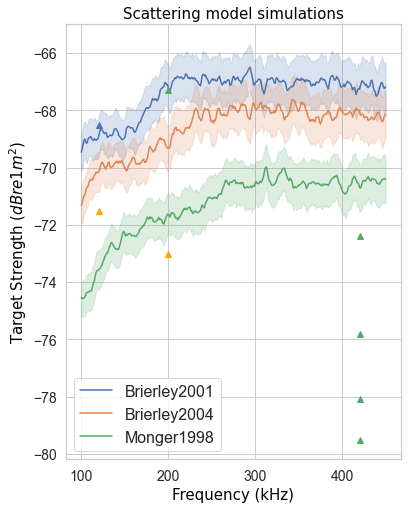

In [105]:
plt.figure(figsize=(6,8))
sns.lineplot(data=simulations, x='freq', y='TS', hue='spec')

# Reported values
plt.plot(120, B2001_120, 'b^')
plt.plot([120, 200], [B2004_120, B2004_200], '^', color='orange')
plt.plot([200, 420, 420, 420, 420], [M1998_200, M1998_420a, M1998_420b, M1998_420c, M1998_420d], 'g^')

plt.legend(fontsize=16)
plt.ylabel('Target Strength ($dB re 1 m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)
plt.title('Scattering model simulations', title_font);

The models above are calculated using the mean length from the reported literature results.


# Modifications
Lavery et al., 2007 uses g=1.02 and h =1.02. -> Does not fit well, too high!

Next try 1.014 g/m3 (0.986). - > better Ts is reduced (try even close to 1?)

Try orientation N(90,20) -> because they are swimming upright (90deg) and common sd is 20... This is ok


Settled on g and h = 1.01. Orientation N(90,30)

# Justify diff
Also must consider shape difference. Aglantha is more bell shape , elongated.